<a href="https://colab.research.google.com/github/Du-nara/ME421-Mechanical-Systems-Lab-A3/blob/main/Copy_of_E_20_256_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello,I'm KAvindu")

Hello,I'm KAvindu


Activity 1

In [ ]:
import numpy as np
from scipy import linalg

# Input your lab measurements here
m1 = 1.0  # kg
m2 = 1.0  # kg
k1 = 400.0 # N/m
k2 = 400.0 # N/m

# Matrix Construction
M = np.array([[m1, 0], [0, m2]])
K = np.array([[k1 + k2, -k2], [-k2, k2]])

# Eigenvalue solution
evals, evecs = linalg.eigh(K, M)
omegas = np.sqrt(evals)
freqs_hz = omegas / (2 * np.pi)

print(f"Mode 1 Frequency: {freqs_hz[0]:.2f} Hz")
print(f"Mode 2 Frequency: {freqs_hz[1]:.2f} Hz")
print("\nMode Shape Matrix (Columns represent modes):\n", evecs)

Mode 1 Frequency: 1.97 Hz
Mode 2 Frequency: 5.15 Hz

Mode Shape Matrix (Columns represent modes):
 [[-0.52573111 -0.85065081]
 [-0.85065081  0.52573111]]


Activity 2

--- Results for Mode 1 (Dominant) ---
Logarithmic Decrement (delta): 0.1638
Estimated Damping Ratio (zeta): 0.0261
Damping Percentage: 2.61%

--- Results for Mode 2 (Secondary) ---
Logarithmic Decrement (delta): 0.4888
Estimated Damping Ratio (zeta): 0.0776
Damping Percentage: 7.76%



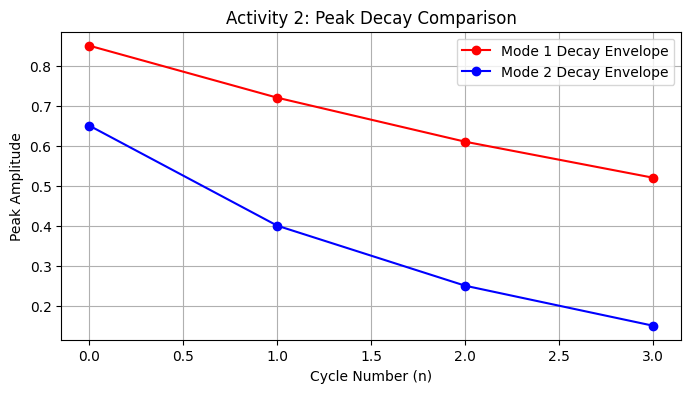

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- LAB DATA INPUT SECTION ---
# Replace these with the peaks you observe on your lab equipment
# Peaks for Mode 1 (Both masses moving in phase)
mode1_peaks = [0.85, 0.72, 0.61, 0.52]

# Peaks for Mode 2 (Masses moving out of phase)
mode2_peaks = [0.65, 0.40, 0.25, 0.15]

def estimate_damping(peak_list, mode_name):
    # Use the first and last measured peak for better accuracy
    x_first = peak_list[0]
    x_last = peak_list[-1]
    n = len(peak_list) - 1 # Number of cycles

    # Calculate delta (Logarithmic Decrement)
    delta = (1/n) * np.log(x_first / x_last)

    # Calculate zeta (Damping Ratio)
    zeta = delta / np.sqrt(4 * np.pi**2 + delta**2)

    print(f"--- Results for {mode_name} ---")
    print(f"Logarithmic Decrement (delta): {delta:.4f}")
    print(f"Estimated Damping Ratio (zeta): {zeta:.4f}")
    print(f"Damping Percentage: {zeta*100:.2f}%\n")
    return zeta

# Execute calculations
zeta1 = estimate_damping(mode1_peaks, "Mode 1 (Dominant)")
zeta2 = estimate_damping(mode2_peaks, "Mode 2 (Secondary)")

# --- VISUALIZATION OF DECAY ENVELOPE ---
plt.figure(figsize=(8, 4))
plt.plot(mode1_peaks, 'ro-', label='Mode 1 Decay Envelope')
plt.plot(mode2_peaks, 'bo-', label='Mode 2 Decay Envelope')
plt.title("Activity 2: Peak Decay Comparison")
plt.xlabel("Cycle Number (n)")
plt.ylabel("Peak Amplitude")
plt.legend()
plt.grid(True)
plt.show()

Activity 3

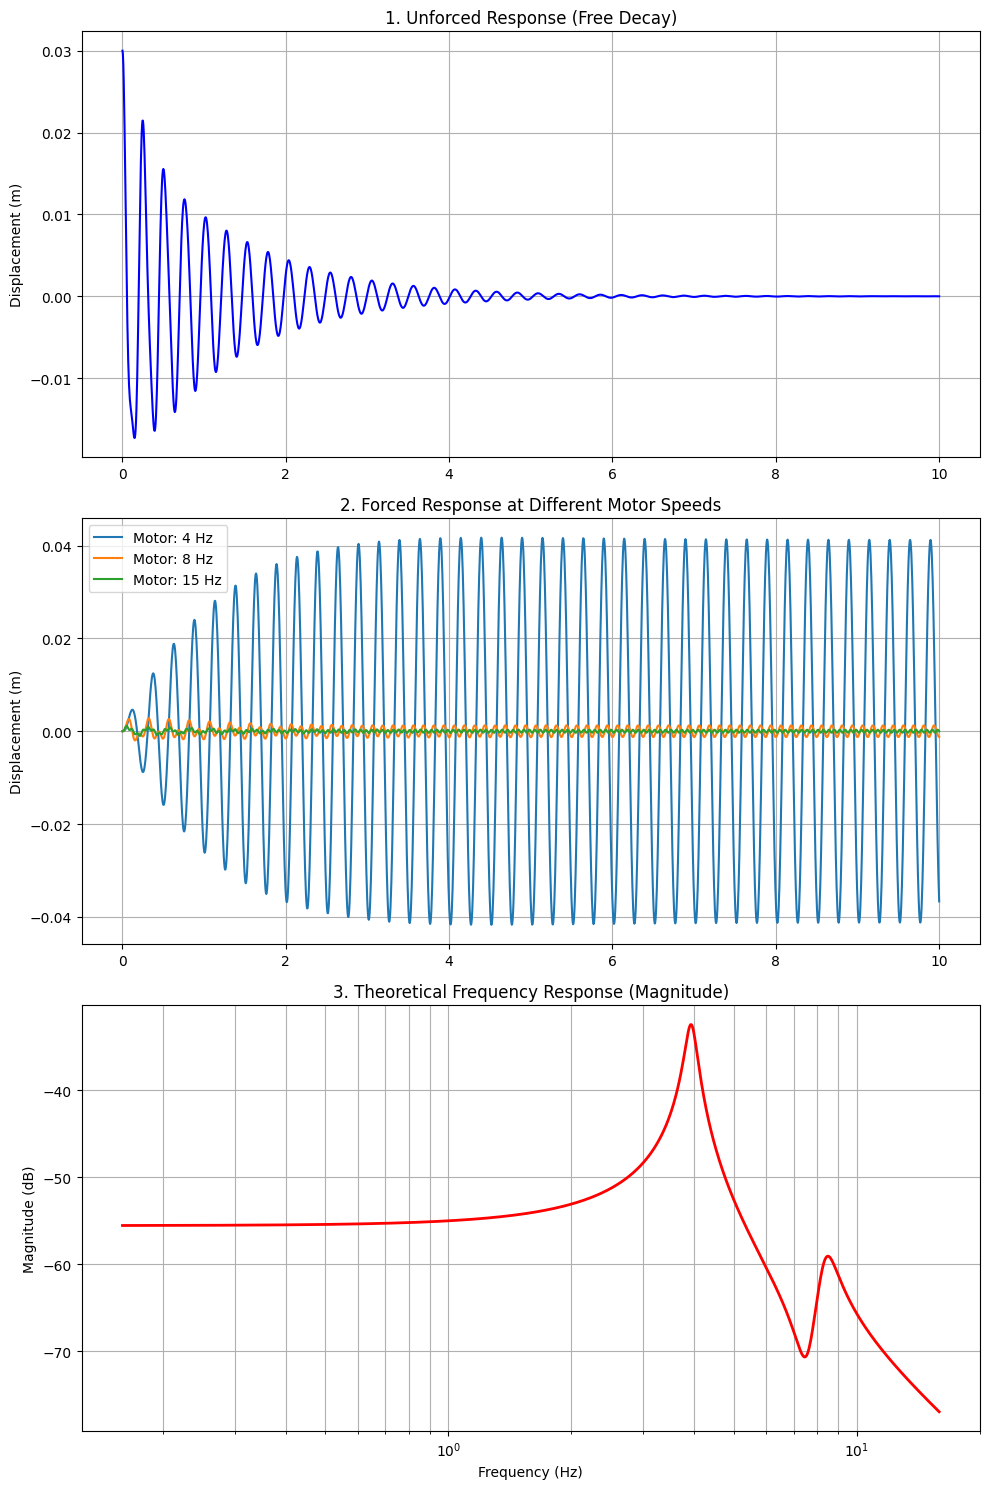

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# --- 1. SYSTEM PARAMETERS ---
# Edit these values based on your lab Activity 1 & 2 results
m1, m2 = 1.2, 0.8
k1, k2 = 1800, 900
zeta1, zeta2 = 0.04, 0.06

# Matrices
M = np.array([[m1, 0], [0, m2]])
K = np.array([[k1+k2, -k2], [-k2, k2]])
C = 0.4 * M + 0.002 * K  # Damping Matrix

# State-Space Formulation
invM = np.linalg.inv(M)
A = np.zeros((4, 4))
A[0:2, 2:4] = np.eye(2)
A[2:4, 0:2] = -invM @ K
A[2:4, 2:4] = -invM @ C

B = np.array([[0], [0], [0], [1/m2]]) # Force applied to the beam end
C_out = np.array([[0, 1, 0, 0]])      # Measuring displacement of beam end (x2)
D = np.array([[0]])

sys = signal.StateSpace(A, B, C_out, D)

# --- 2. GENERATE PLOTS ---
t = np.linspace(0, 10, 2000)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot 1: Unforced Response (Corrected Unpacking)
x0 = [0, 0.03, 0, 0] # 3cm initial displacement
t_free, y_free, x_state = signal.lsim(sys, U=np.zeros(len(t)), T=t, X0=x0)
axes[0].plot(t_free, y_free, 'b', lw=1.5)
axes[0].set_title("1. Unforced Response (Free Decay)")
axes[0].set_ylabel("Displacement (m)")
axes[0].grid(True)

# Plot 2: Forced Response
speeds_hz = [4, 8, 15]
for f in speeds_hz:
    omega = 2 * np.pi * f
    u_forced = 2.0 * np.sin(omega * t)
    t_f, y_f, _ = signal.lsim(sys, U=u_forced, T=t)
    axes[1].plot(t_f, y_f, label=f'Motor: {f} Hz')
axes[1].set_title("2. Forced Response at Different Motor Speeds")
axes[1].set_ylabel("Displacement (m)")
axes[1].legend()
axes[1].grid(True)

# Plot 3: Theoretical FRF (Bode)
w_range = np.logspace(0, 2, 1000) # rad/s
w, mag, phase = signal.bode(sys, w=w_range)
axes[2].semilogx(w/(2*np.pi), mag, 'r', lw=2)
axes[2].set_title("3. Theoretical Frequency Response (Magnitude)")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_ylabel("Magnitude (dB)")
axes[2].grid(True, which="both")

plt.tight_layout()
plt.show()